### **Starting with the 1st Dataset i.e. ('/content/1 Home Prices.csv)**

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_csv("/content/1 Home Prices.csv")
df1.head()

,observation_date,CSUSHPISA
0,2005-01-01,161.289
1,2005-02-01,163.346
2,2005-03-01,165.814
3,2005-04-01,167.503
4,2005-05-01,169.352


In [147]:
# Convert date column to datetime
df1['observation_date'] = pd.to_datetime(df1['observation_date'])

# Set date as index
df1.set_index('observation_date', inplace=True)

# Rename column for clarity
df1.rename(columns={'CSUSHPISA': 'Home_Price_Index'}, inplace=True)

# Filter to 2005–2025
df1 = df1['2005-01-01':'2025-01-01']




In [148]:
df1.head()

,Home_Price_Index
observation_date,
2005-01-01,161.289
2005-02-01,163.346
2005-03-01,165.814
2005-04-01,167.503
2005-05-01,169.352


<Axes: title={'center': 'S&P Case-Shiller U.S. Home Price Index'}, xlabel='observation_date'>

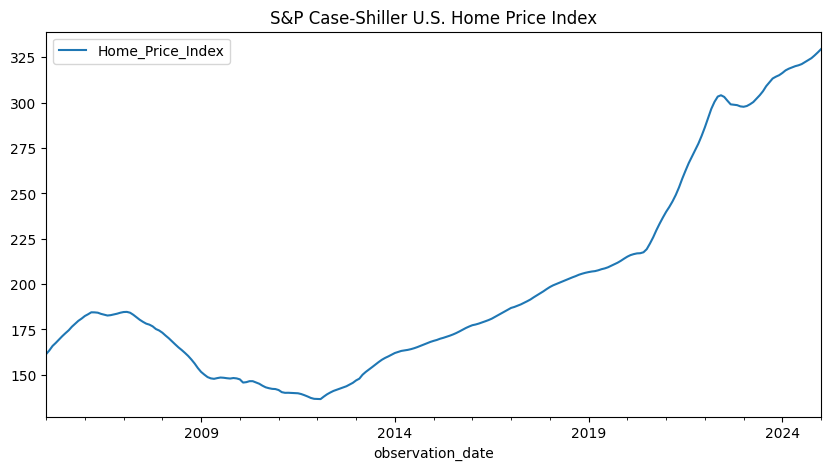

In [149]:
# Plot the data
df1.plot(title="S&P Case-Shiller U.S. Home Price Index", figsize=(10, 5))

# **Working on the 2nd Dataset i.e. ('/content/2 Mortgage Rates.csv')**

In [150]:
df2=pd.read_csv("/content/2 Mortgage Rates.csv")
df2.head()

,observation_date,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [151]:
# Convert to datetime
df2['observation_date'] = pd.to_datetime(df2['observation_date'])

# Set index
df2.set_index('observation_date', inplace=True)

# Rename column
df2.rename(columns={'MORTGAGE30US': 'Mortgage_Rate'}, inplace=True)

# ✅ Filter to 2005–2025
df2 = df2['2005-01-01':'2025-01-01']

In [152]:
df2.head()

,Mortgage_Rate
observation_date,
2005-01-06,5.77
2005-01-13,5.74
2005-01-20,5.67
2005-01-27,5.66
2005-02-03,5.63


In [153]:
# checking the min and max values in the date range
df2.index.min(), df2.index.max()

(Timestamp('2005-01-06 00:00:00'), Timestamp('2024-12-26 00:00:00'))

<Axes: title={'center': '30 Year Fixed Mortgage Rate(%)'}, xlabel='observation_date'>

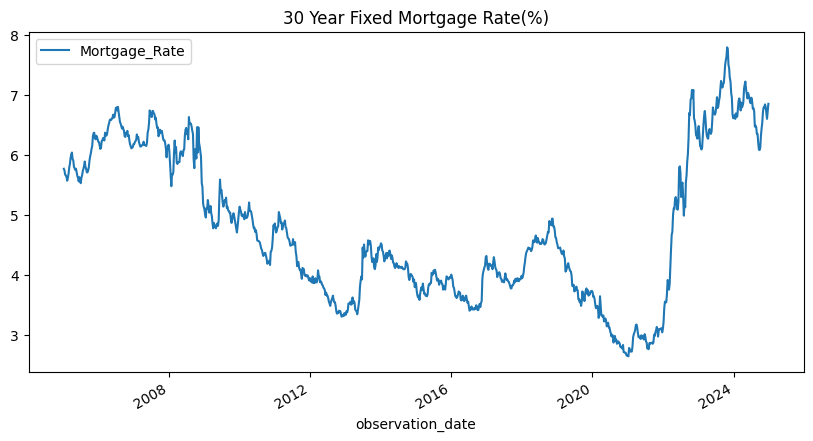

In [154]:
# Plot to visually inspect
df2.plot(title='30 Year Fixed Mortgage Rate(%)',figsize=(10, 5))

### **Working on the 3rd Dataset i.e.('/content/3 Unemployment Rate.csv')**

---

In [155]:
df3=pd.read_csv("/content/3 Unemployment Rate.csv")
df3.head()

,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [156]:
# Convert date column
df3['observation_date'] = pd.to_datetime(df3['observation_date'])

# Set index
df3.set_index('observation_date', inplace=True)

# Rename column
df3.rename(columns={'UNRATE':'Unemployment_Rate'}, inplace=True)

# Filter to match the older datasets
df3=df3['2005-01-01':'2025-01-01']

In [157]:
df3.head()

,Unemployment_Rate
observation_date,
2005-01-01,5.3
2005-02-01,5.4
2005-03-01,5.2
2005-04-01,5.2
2005-05-01,5.1


<Axes: title={'center': 'U.S. Unemployment Rate (%)'}, xlabel='observation_date'>

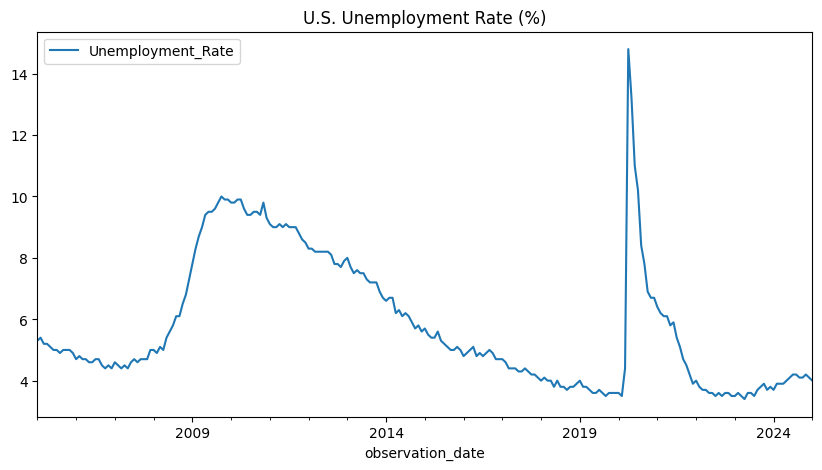

In [158]:
df3.plot(title="U.S. Unemployment Rate (%)", figsize=(10,5))

# **Working with the 4th Dataset i.e.('/content/4 Median Household Income.xlsx'**

In [159]:
#Load the raw dataset
df4_raw=pd.read_excel('/content/4 Median Household Income.xlsx',skiprows=8)
df4_raw.head(100)

,Unnamed: 0,Unnamed: 1,Current\ndollars,2023\ndollars,Current\ndollars.1,2023\ndollars.1
0,2023,132200,80610,80610,114500,114500
1,2022,131400,74580,77540,106400,110600
2,2021,131200,70780,79260,102300,114600
3,2020 (41),129200,68010,79560,97470,114000
4,2019,128500,68700,81210,98090,115900
...,...,...,...,...,...,...
95,1995 (25),84510,35770,66930,46730,87440
96,1994 (24),83740,34030,65180,45030,86260
97,1993 (23),82390,32960,64520,43290,84730
98,1992 (22),81800,32210,64610,40590,81430


In [160]:
# Select and rename only the necessary columns
df4 = df4_raw[['Unnamed: 0', '2023\ndollars']].copy()
df4.columns = ['Year', 'Median_Income_2023Dollars']

# Drop any rows with missing or non-numeric year/income
df4 = df4[pd.to_numeric(df4['Year'], errors='coerce').notnull()]

# Convert 'Median_Income_2023Dollars' to numeric, coercing errors
df4['Median_Income_2023Dollars'] = pd.to_numeric(df4['Median_Income_2023Dollars'], errors='coerce')

df4 = df4.dropna(subset=['Median_Income_2023Dollars'])

# Convert Year to datetime and set as index
df4['Year'] = pd.to_datetime(df4['Year'].astype(int), format='%Y')
df4.set_index('Year', inplace=True)

#Check for duplicates in the index
print("Duplicate years:", df4.index.duplicated().sum())

#Drop duplicate years if any
df4 = df4[~df4.index.duplicated(keep='first')]

#Resample to monthly using 'ME' (month-end) and interpolate
df4 = df4.resample('ME').interpolate()

#Preview
df4.head(12)

Duplicate years: 196


,Median_Income_2023Dollars
Year,
1968-01-31,NaN
1968-02-29,NaN
1968-03-31,NaN
1968-04-30,NaN
1968-05-31,NaN
1968-06-30,NaN
1968-07-31,NaN
1968-08-31,NaN
1968-09-30,NaN


## **Working with the 5th dataset i.e.('/content/5 Housing Supply.csv')**

In [161]:
df5=pd.read_csv("/content/5 Housing Supply.csv")
df5.head()

,observation_date,HOUST
0,1959-01-01,1657
1,1959-02-01,1667
2,1959-03-01,1620
3,1959-04-01,1590
4,1959-05-01,1498


In [162]:
# Convert date column
df5['observation_date'] = pd.to_datetime(df5['observation_date'])

# Set index
df5.set_index('observation_date', inplace=True)

# Rename column
df5.rename(columns={'HOUST': 'Housing_Starts'}, inplace=True)

# Sorrt by date
df5.sort_index(inplace=True)

# Preview
df5.head()

,Housing_Starts
observation_date,
1959-01-01,1657
1959-02-01,1667
1959-03-01,1620
1959-04-01,1590
1959-05-01,1498


# **Working with the 6th Dataset i.e.('/content/6 CPI.csv')**



In [163]:
df6=pd.read_csv('/content/6 CPI.csv')
df6.head()

,observation_date,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [164]:
#Convert 'observation_date' to datetime format
df6['observation_date'] = pd.to_datetime(df6['observation_date'])

#Rename columns for clarity
df6 = df6.rename(columns={'observation_date': 'Date', 'CPIAUCSL': 'CPI'})

#Filter data for the last 20 years only (from 2004 onwards)
df6 = df6[df6['Date'] >= '2004-01-01']

# Reseting index
df6 = df6.reset_index(drop=True)

#Preview
df6.head()


,Date,CPI
0,2004-01-01,186.3
1,2004-02-01,186.7
2,2004-03-01,187.1
3,2004-04-01,187.4
4,2004-05-01,188.2


# **Wrking with the 7th Dataset i.e.('/content/7 NA-EST2024-POP(population estimates 2020-2025).xlsx')**

In [165]:
df7=pd.read_excel('/content/7 NA-EST2024-POP_cleaned.xlsx')
df7.head(5)

,Year and Month,Resident Population,Resident Population Plus Armed Forces Overseas,Civilian Population,Civilian Noninstitutionalized Population,Household Population
0,2020/04/01,331515736,331762541,330399333,326632458,323210375
1,2020/05/01,331492675,331737583,330380368,326635212,323237270
2,2020/06/01,331520866,331765357,330408003,326684566,323315417
3,2020/07/01,331577720,331824013,330463045,326761328,323422229
4,2020/08/01,331651901,331898856,330530744,326841522,323516599


In [166]:
#Keep only relevant columns
df7 = df7[['Year and Month', 'Resident Population']]

# Rename columns
df7.columns = ['Date', 'Population']

# Convert Date to datetime
df7['Date'] = pd.to_datetime(df7['Date'])

# Remove commas from Population and convert to integer
df7['Population'] = df7['Population'].astype(str).str.replace(',', '').astype(int)

# Set Date as index (optional but helpful)
df7.set_index('Date', inplace=True)

# Preview cleaned DataFrame
df7.head()


,Population
Date,
2020-04-01,331515736
2020-05-01,331492675
2020-06-01,331520866
2020-07-01,331577720
2020-08-01,331651901


# **Working with the 8th dataset i.e.('/content/8 NST-EST2020(population totals 2000-2020).xlsx'**

In [167]:
import pandas as pd

# Load and skip the first row (header explanation)
df = pd.read_excel("/content/8 NST-EST2020(population totals 2000-2020).xlsx", skiprows=1)

# These are July 1 population estimate columns from 2010 to 2020
july_columns = [
    'Population Estimate (as of July 1)', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
    'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 14'  # July 1, 2020
]

# Replace with actual years
year_labels = [str(y) for y in range(2010, 2021)]

# Subset and rename columns
df_july = df[['Geographic Area'] + july_columns].copy()
df_july.columns = ['Geographic Area'] + year_labels


In [168]:
# Convert from wide to long format (year as row)
df_long = df_july.melt(id_vars='Geographic Area', var_name='Year', value_name='Population')


In [169]:
# Clean the population values and convert date
# Step 4: Remove NaN and non-numeric population values
df_long = df_long.dropna(subset=['Population'])  # Drop rows where Population is NaN

# Remove commas and keep only numeric strings
df_long = df_long[df_long['Population'].astype(str).str.replace(',', '').str.isnumeric()]

# Convert cleaned population column to int
df_long['Population'] = df_long['Population'].astype(str).str.replace(',', '').astype(int)

# Add date column
df_long['Date'] = pd.to_datetime(df_long['Year'] + '-07-01')


In [170]:
# Set index or reorder
df_long = df_long[['Date', 'Geographic Area', 'Population']].sort_values(['Geographic Area', 'Date'])
# df_long.set_index('Date', inplace=True)  # optional


In [171]:
df8 = df_long[df_long['Geographic Area'] == 'United States'].copy()
df8.reset_index(drop=True, inplace=True)


In [172]:
df8

,Date,Geographic Area,Population
0,2020-07-01,United States,329484123


In [173]:
df7_raw = pd.read_excel("/content/7 NA-EST2024-POP_cleaned.xlsx", header=None)
df7_raw.head(15)


,0,1,2,3,4,5
0,Year and Month,Resident Population,Resident Population Plus Armed Forces Overseas,Civilian Population,Civilian Noninstitutionalized Population,Household Population
1,2020/04/01,331515736,331762541,330399333,326632458,323210375
2,2020/05/01,331492675,331737583,330380368,326635212,323237270
3,2020/06/01,331520866,331765357,330408003,326684566,323315417
4,2020/07/01,331577720,331824013,330463045,326761328,323422229
5,2020/08/01,331651901,331898856,330530744,326841522,323516599
6,2020/09/01,331726967,331973361,330599537,326922811,323611855
7,2020/10/01,331814113,332059986,330686200,327021970,323719191
8,2020/11/01,331876109,332123246,330747727,327095993,323801377
9,2020/12/01,331889831,332135371,330759993,327120755,323835289


In [174]:
# Load with correct header
df7 = pd.read_excel("/content/7 NA-EST2024-POP_cleaned.xlsx", header=0)

# Select and rename necessary columns
df7_cleaned = df7[['Year and Month', 'Resident Population']].copy()
df7_cleaned.columns = ['Date', 'Population']

# Convert 'Date' to datetime format
df7_cleaned['Date'] = pd.to_datetime(df7_cleaned['Date'])

# Add source label for tracking
df7_cleaned['Source'] = 'Monthly Census Estimates'

# Preview
df7_cleaned.head()


,Date,Population,Source
0,2020-04-01,331515736,Monthly Census Estimates
1,2020-05-01,331492675,Monthly Census Estimates
2,2020-06-01,331520866,Monthly Census Estimates
3,2020-07-01,331577720,Monthly Census Estimates
4,2020-08-01,331651901,Monthly Census Estimates


In [175]:
#Ensure both datasets have the same column names
df8_cleaned = df_long[['Date', 'Geographic Area', 'Population']].copy()
df8_cleaned = df8_cleaned[df8_cleaned['Geographic Area'] == 'United States']
df8_cleaned['Source'] = 'July 1 Annual Census Estimates'
df8_cleaned = df8_cleaned.drop(columns='Geographic Area')

# Align df7_cleaned column order
df7_cleaned = df7_cleaned[['Date', 'Population', 'Source']]

# Combine both
population_combined = pd.concat([df8_cleaned, df7_cleaned]).sort_values('Date').reset_index(drop=True)

# Final preview
population_combined.head(10)


,Date,Population,Source
0,2020-04-01,331515736,Monthly Census Estimates
1,2020-05-01,331492675,Monthly Census Estimates
2,2020-06-01,331520866,Monthly Census Estimates
3,2020-07-01,329484123,July 1 Annual Census Estimates
4,2020-07-01,331577720,Monthly Census Estimates
5,2020-08-01,331651901,Monthly Census Estimates
6,2020-09-01,331726967,Monthly Census Estimates
7,2020-10-01,331814113,Monthly Census Estimates
8,2020-11-01,331876109,Monthly Census Estimates
9,2020-12-01,331889831,Monthly Census Estimates


# **merging all cleaned DataFrames into a single master dataset based on the Date column**

In [176]:
df1 = pd.read_csv('/content/1 Home Prices.csv')
print(df1.head())
print(df1.columns)
df1.columns = ['Date', 'Home_Price_Index']
df1['Date'] = pd.to_datetime(df1['Date'])
# Rename columns properly in df1
df1.rename(columns={'observation_date': 'Date', 'CSUSHPISA': 'Home_Price_Index'}, inplace=True)

# Create master_df with the renamed columns
master_df = df1.copy()
print(master_df.head())


  observation_date  CSUSHPISA
0       2005-01-01    161.289
1       2005-02-01    163.346
2       2005-03-01    165.814
3       2005-04-01    167.503
4       2005-05-01    169.352
Index(['observation_date', 'CSUSHPISA'], dtype='object')
        Date  Home_Price_Index
0 2005-01-01           161.289
1 2005-02-01           163.346
2 2005-03-01           165.814
3 2005-04-01           167.503
4 2005-05-01           169.352


In [179]:
# If Date is an index, reset it
df2 = df2.reset_index()
master_df = master_df.reset_index()

# Then rename
df2.rename(columns={'observation_date': 'Date', 'MORTGAGE30US': 'Mortgage_Rate'}, inplace=True)

# Confirm both contain 'Date'
print('df2 columns:', df2.columns)
print('master_df columns:', master_df.columns)

# Merge
master_df = pd.merge(master_df, df2, on='Date', how='left')



df2 columns: Index(['Date', 'Mortgage_Rate'], dtype='object')
master_df columns: Index(['index', 'Date', 'Home_Price_Index'], dtype='object')


In [180]:
# Rename if not already
df2.rename(columns={'observation_date': 'Date', 'MORTGAGE30US': 'Mortgage_Rate'}, inplace=True)

# Merge into master_df
master_df = pd.merge(master_df, df2, on='Date', how='left')


In [181]:
# print("master_df:", master_df.columns.tolist())
print("df2:", df2.columns.tolist())


df2: ['Date', 'Mortgage_Rate']


In [182]:
print(df2.columns.tolist())       # Confirm visible columns
print(df2.index.name)             # Check if 'observation_date' is in the index
print(df2.head())                 # View top 5 rows


['Date', 'Mortgage_Rate']
None
        Date  Mortgage_Rate
0 2005-01-06           5.77
1 2005-01-13           5.74
2 2005-01-20           5.67
3 2005-01-27           5.66
4 2005-02-03           5.63


In [183]:
# Reset index so observation_date becomes a column
df2 = df2.reset_index()

# Then rename properly
df2.rename(columns={'observation_date': 'Date', 'MORTGAGE30US': 'Mortgage_Rate'}, inplace=True)


In [184]:
# Merge into master_df
master_df = pd.merge(master_df, df2, on='Date', how='left')


In [185]:
print(df3.columns)


Index(['Unemployment_Rate'], dtype='object')


In [193]:
df3.rename(columns={'observation_date': 'Date', 'UNRATE': 'Unemployment_Rate'}, inplace=True)


In [199]:
# --- df3: Unemployment Rate ---
if 'observation_date' in df3.columns:
    df3 = df3.rename(columns={'observation_date': 'Date'})
elif 'DATE' in df3.columns:
    df3 = df3.rename(columns={'DATE': 'Date'})
df3['Date'] = pd.to_datetime(df3['Date'], errors='coerce')
df3 = df3.dropna(subset=['Date'])
df3 = df3[['Date', 'Unemployment_Rate']]
master_df = master_df.drop(columns=['Unemployment_Rate'], errors='ignore')
master_df = pd.merge(master_df, df3, on='Date', how='left')

# --- df4: Median Household Income ---
df4 = df4.drop(columns=['level_0', 'index'], errors='ignore')
df4 = df4.reset_index(drop=True)
if 'Year' in df4.columns and 'Median_Income_2023Dollars' in df4.columns:
    # Create a monthly date for merging
    df4['Date'] = pd.to_datetime(df4['Year'].astype(str) + '-01-01')
    df4 = df4[['Date', 'Median_Income_2023Dollars']]
master_df = master_df.drop(columns=['Median_Income_2023Dollars'], errors='ignore')
master_df = pd.merge(master_df, df4, on='Date', how='left')

# --- df5: Housing Supply / Starts ---
df5 = df5.drop(columns=['level_0', 'index'], errors='ignore')
df5 = df5.reset_index(drop=True)

# Identify and convert appropriate date field
if 'Year' in df5.columns and 'Housing_Starts' in df5.columns:
    df5['Date'] = pd.to_datetime(df5['Year'].astype(str) + '-01-01')
elif 'DATE' in df5.columns:
    df5.rename(columns={'DATE': 'Date'}, inplace=True)
    df5['Date'] = pd.to_datetime(df5['Date'])
elif 'Date' not in df5.columns:
    print("⚠️ ERROR: df5 has no recognized date column like 'Year', 'DATE', or 'Date'")
    print("df5.columns:", df5.columns)

# Now select only the required columns
if 'Date' in df5.columns and 'Housing_Starts' in df5.columns:
    df5 = df5[['Date', 'Housing_Starts']]
    master_df = master_df.drop(columns=['Housing_Starts'], errors='ignore')
    master_df = pd.merge(master_df, df5, on='Date', how='left')
else:
    print("⚠️ Skipping df5 merge: Required columns missing.")


# --- df6: CPI ---
df6 = df6.drop(columns=['level_0', 'index'], errors='ignore')
df6 = df6.reset_index(drop=True)
if 'DATE' in df6.columns:
    df6.rename(columns={'DATE': 'Date'}, inplace=True)
df6['Date'] = pd.to_datetime(df6['Date'])
df6 = df6[['Date', 'CPI']]
master_df = master_df.drop(columns=['CPI'], errors='ignore')
master_df = pd.merge(master_df, df6, on='Date', how='left')

# --- df7_cleaned: Monthly Population ---
df7_cleaned.columns = ['Date', 'Population_Monthly', 'Source']
df7_cleaned['Date'] = pd.to_datetime(df7_cleaned['Date'])
master_df = master_df.drop(columns=['Population_Monthly', 'Source'], errors='ignore')
master_df = pd.merge(master_df, df7_cleaned, on='Date', how='left')

# --- df_long: Annual Population ---
df_long = df_long[df_long['Geographic Area'] == 'United States']
df_long = df_long[['Date', 'Population']]
df_long.columns = ['Date', 'Population_Annual']
df_long['Date'] = pd.to_datetime(df_long['Date'])
master_df = master_df.drop(columns=['Population_Annual'], errors='ignore')
master_df = pd.merge(master_df, df_long, on='Date', how='left')

⚠️ ERROR: df5 has no recognized date column like 'Year', 'DATE', or 'Date'
df5.columns: Index(['observation_date', 'Housing_Starts'], dtype='object')
⚠️ Skipping df5 merge: Required columns missing.


In [200]:
print("master_df columns:", master_df.columns.tolist())
print("df3 columns:", df3.columns.tolist())

master_df columns: ['index_x', 'Date', 'Home_Price_Index', 'Mortgage_Rate_x', 'Mortgage_Rate_y', 'index_y', 'Mortgage_Rate', 'Unemployment_Rate', 'Median_Income_2023Dollars', 'CPI', 'Population_Monthly', 'Source', 'Population_Annual']
df3 columns: ['Date', 'Unemployment_Rate']


In [201]:
master_df = master_df.sort_values('Date')
master_df.reset_index(drop=True, inplace=True)


In [202]:
master_df.head()

,index_x,Date,Home_Price_Index,Mortgage_Rate_x,Mortgage_Rate_y,index_y,Mortgage_Rate,Unemployment_Rate,Median_Income_2023Dollars,CPI,Population_Monthly,Source,Population_Annual
0,0,2005-01-01,161.289,NaN,NaN,NaN,NaN,5.3,NaN,191.6,NaN,NaN,NaN
1,1,2005-02-01,163.346,NaN,NaN,NaN,NaN,5.4,NaN,192.4,NaN,NaN,NaN
2,2,2005-03-01,165.814,NaN,NaN,NaN,NaN,5.2,NaN,193.1,NaN,NaN,NaN
3,3,2005-04-01,167.503,NaN,NaN,NaN,NaN,5.2,NaN,193.7,NaN,NaN,NaN
4,4,2005-05-01,169.352,NaN,NaN,NaN,NaN,5.1,NaN,193.6,NaN,NaN,NaN


In [203]:
master_df.to_csv('/content/master_df1.csv', index=False)

In [212]:
import pandas as pd
master_df=pd.read_csv('/content/master_df1.csv')
master_df.head()

,Date,Home_Price_Index,Mortgage_Rate,CPI_x,CPI_y,Unemployment_Rate,index_x,Housing_Starts,index_y,CPI,Population_Monthly,Source,Population_Annual
0,2005-01-01,161.289,NaN,191.6,191.6,5.3,552,2144,12,191.6,NaN,NaN,NaN
1,2005-02-01,163.346,NaN,192.4,192.4,5.4,553,2207,13,192.4,NaN,NaN,NaN
2,2005-03-01,165.814,NaN,193.1,193.1,5.2,554,1864,14,193.1,NaN,NaN,NaN
3,2005-04-01,167.503,NaN,193.7,193.7,5.2,555,2061,15,193.7,NaN,NaN,NaN
4,2005-05-01,169.352,NaN,193.6,193.6,5.1,556,2025,16,193.6,NaN,NaN,NaN


In [213]:
print(master_df.shape)
print(master_df.dtypes)
print(master_df.columns.tolist())
master_df.head(3)


(243, 13)
Date                   object
Home_Price_Index      float64
Mortgage_Rate         float64
CPI_x                 float64
CPI_y                 float64
Unemployment_Rate     float64
index_x                 int64
Housing_Starts          int64
index_y                 int64
CPI                   float64
Population_Monthly    float64
Source                 object
Population_Annual     float64
dtype: object
['Date', 'Home_Price_Index', 'Mortgage_Rate', 'CPI_x', 'CPI_y', 'Unemployment_Rate', 'index_x', 'Housing_Starts', 'index_y', 'CPI', 'Population_Monthly', 'Source', 'Population_Annual']


,Date,Home_Price_Index,Mortgage_Rate,CPI_x,CPI_y,Unemployment_Rate,index_x,Housing_Starts,index_y,CPI,Population_Monthly,Source,Population_Annual
0,2005-01-01,161.289,NaN,191.6,191.6,5.3,552,2144,12,191.6,NaN,NaN,NaN
1,2005-02-01,163.346,NaN,192.4,192.4,5.4,553,2207,13,192.4,NaN,NaN,NaN
2,2005-03-01,165.814,NaN,193.1,193.1,5.2,554,1864,14,193.1,NaN,NaN,NaN


In [214]:
# Basic info
master_df.info()

# Preview numeric stats
master_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                243 non-null    object 
 1   Home_Price_Index    243 non-null    float64
 2   Mortgage_Rate       32 non-null     float64
 3   CPI_x               243 non-null    float64
 4   CPI_y               243 non-null    float64
 5   Unemployment_Rate   241 non-null    float64
 6   index_x             243 non-null    int64  
 7   Housing_Starts      243 non-null    int64  
 8   index_y             243 non-null    int64  
 9   CPI                 243 non-null    float64
 10  Population_Monthly  60 non-null     float64
 11  Source              60 non-null     object 
 12  Population_Annual   1 non-null      float64
dtypes: float64(8), int64(3), object(2)
memory usage: 24.8+ KB


,Home_Price_Index,Mortgage_Rate,CPI_x,CPI_y,Unemployment_Rate,index_x,Housing_Starts,index_y,CPI,Population_Monthly,Population_Annual
count,243.000000,32.000000,243.000000,243.000000,241.000000,243.000000,243.000000,243.000000,243.000000,6.000000e+01,1.0
mean,199.427333,4.880312,243.251576,243.251576,5.810788,673.000000,1200.304527,133.000000,243.251576,3.353863e+08,329484123.0
std,56.627290,1.249259,33.232846,33.232846,2.138177,70.292247,407.685310,70.292247,33.232846,3.345630e+06,NaN
min,136.526000,2.880000,191.600000,191.600000,3.400000,552.000000,478.000000,12.000000,191.600000,3.314927e+08,329484123.0
25%,159.656000,3.930000,217.433000,217.433000,4.100000,612.500000,920.000000,72.500000,217.433000,3.320751e+08,329484123.0
50%,180.911000,4.505000,237.336000,237.336000,5.000000,673.000000,1208.000000,133.000000,237.336000,3.346642e+08,329484123.0
75%,216.184000,6.200000,257.977500,257.977500,7.300000,733.500000,1454.000000,193.500000,257.977500,3.383207e+08,329484123.0
max,330.384000,6.790000,319.775000,319.775000,14.800000,794.000000,2273.000000,254.000000,319.775000,3.414138e+08,329484123.0


In [215]:
# Drop redundant columns
master_df = master_df.drop(columns=['CPI_x', 'CPI_y', 'index_x', 'index_y'], errors='ignore')


In [216]:
master_df['Date'] = pd.to_datetime(master_df['Date'])
master_df = master_df.sort_values('Date')


In [217]:
master_df.isnull().sum()


,0
Date,0
Home_Price_Index,0
Mortgage_Rate,211
Unemployment_Rate,2
Housing_Starts,0
CPI,0
Population_Monthly,183
Source,183
Population_Annual,242


In [218]:
# Forward-fill Mortgage Rate and Unemployment
master_df['Mortgage_Rate'] = master_df['Mortgage_Rate'].ffill()
master_df['Unemployment_Rate'] = master_df['Unemployment_Rate'].ffill()

# Forward-fill or interpolate Population_Monthly
master_df['Population_Monthly'] = master_df['Population_Monthly'].interpolate(method='linear')


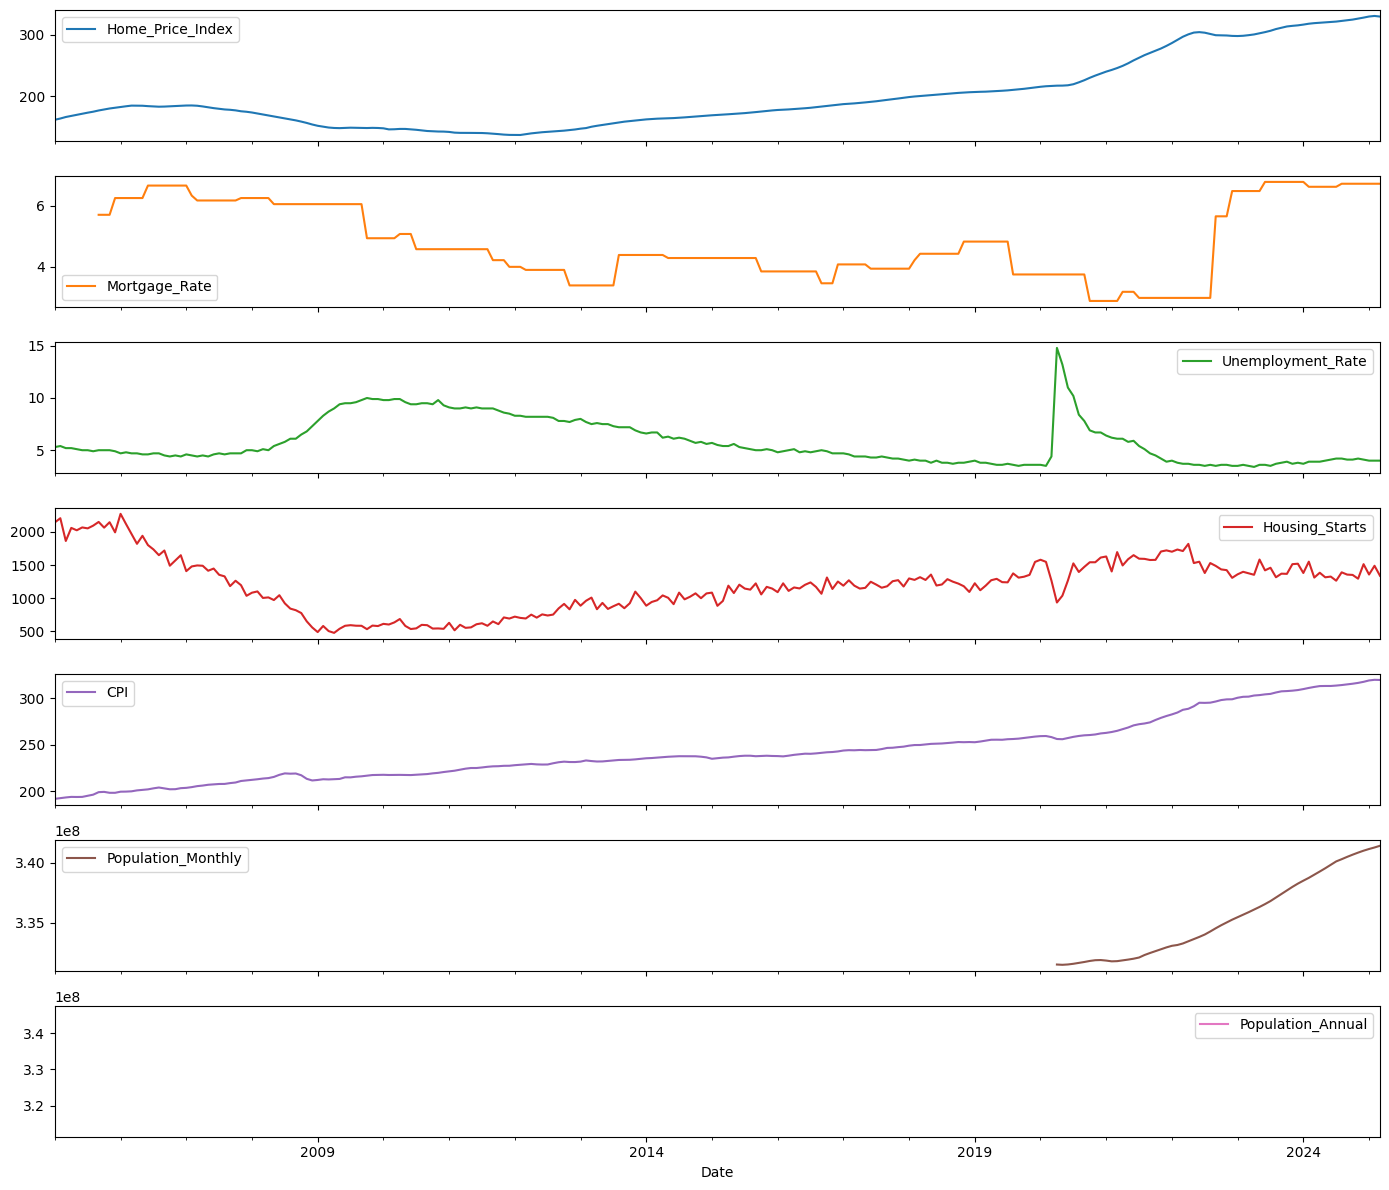

In [219]:
import matplotlib.pyplot as plt

# Plot all main indicators
master_df.set_index('Date')[['Home_Price_Index', 'Mortgage_Rate', 'Unemployment_Rate',
                             'Housing_Starts', 'CPI', 'Population_Monthly', 'Population_Annual']].plot(subplots=True, figsize=(14,12))
plt.tight_layout()
plt.show()


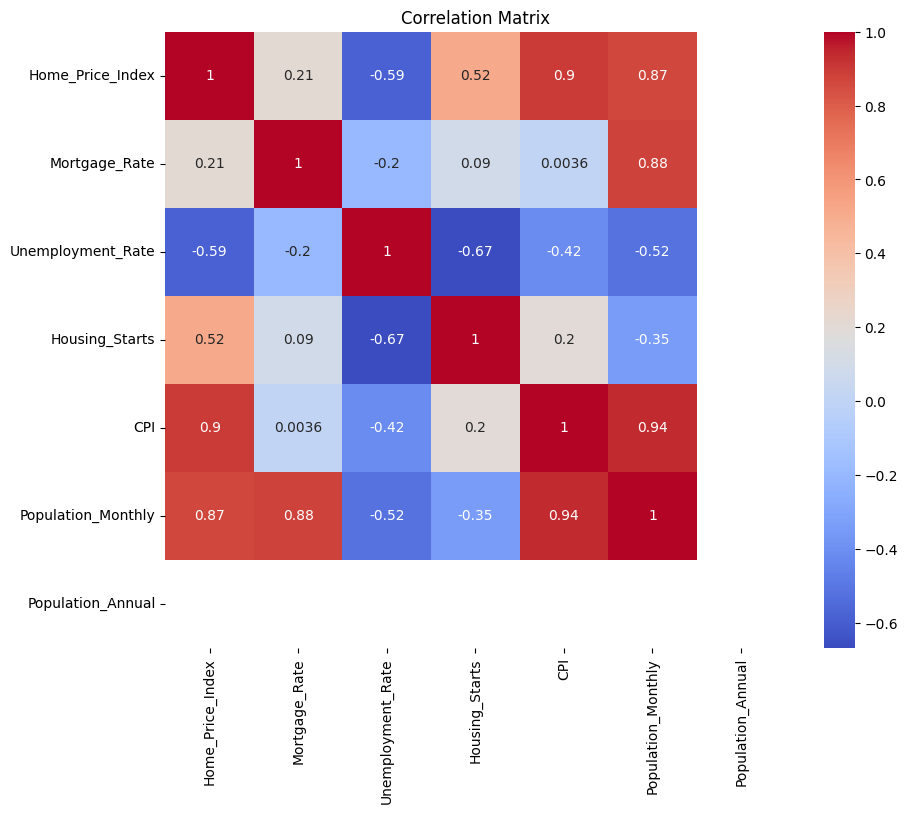

In [220]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(master_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [221]:
master_df['Mortgage_Rate'] = master_df['Mortgage_Rate'].ffill().bfill()


In [222]:
master_df['Population_Monthly'] = master_df['Population_Monthly'].interpolate(method='linear')


In [223]:
master_df = master_df.drop(columns=['Source', 'Population_Annual'], errors='ignore')


In [224]:
master_df.isnull().sum()


,0
Date,0
Home_Price_Index,0
Mortgage_Rate,0
Unemployment_Rate,0
Housing_Starts,0
CPI,0
Population_Monthly,183


In [225]:
master_df['Date'] = pd.to_datetime(master_df['Date'])
master_df = master_df.sort_values('Date').reset_index(drop=True)


In [226]:
master_df['Population_Monthly'] = master_df['Population_Monthly'].interpolate(method='linear')


In [227]:
master_df['Population_Monthly'] = master_df['Population_Monthly'].interpolate(method='linear', limit_direction='both')


In [228]:
master_df.isnull().sum()


,0
Date,0
Home_Price_Index,0
Mortgage_Rate,0
Unemployment_Rate,0
Housing_Starts,0
CPI,0
Population_Monthly,0


In [229]:
master_df.info()
master_df.describe()
master_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                243 non-null    datetime64[ns]
 1   Home_Price_Index    243 non-null    float64       
 2   Mortgage_Rate       243 non-null    float64       
 3   Unemployment_Rate   243 non-null    float64       
 4   Housing_Starts      243 non-null    int64         
 5   CPI                 243 non-null    float64       
 6   Population_Monthly  243 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.4 KB


,Date,Home_Price_Index,Mortgage_Rate,Unemployment_Rate,Housing_Starts,CPI,Population_Monthly
0,2005-01-01,161.289,5.71,5.3,2144,191.6,331515736.0
1,2005-02-01,163.346,5.71,5.4,2207,192.4,331515736.0
2,2005-03-01,165.814,5.71,5.2,1864,193.1,331515736.0
3,2005-04-01,167.503,5.71,5.2,2061,193.7,331515736.0
4,2005-05-01,169.352,5.71,5.1,2025,193.6,331515736.0


In [230]:
master_df.duplicated().sum()


np.int64(0)

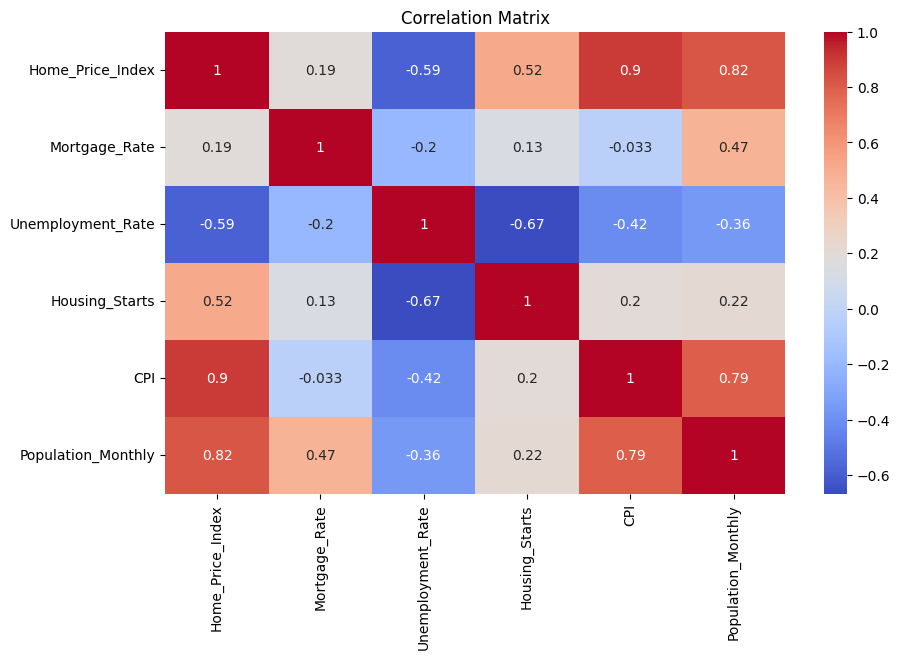

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(master_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


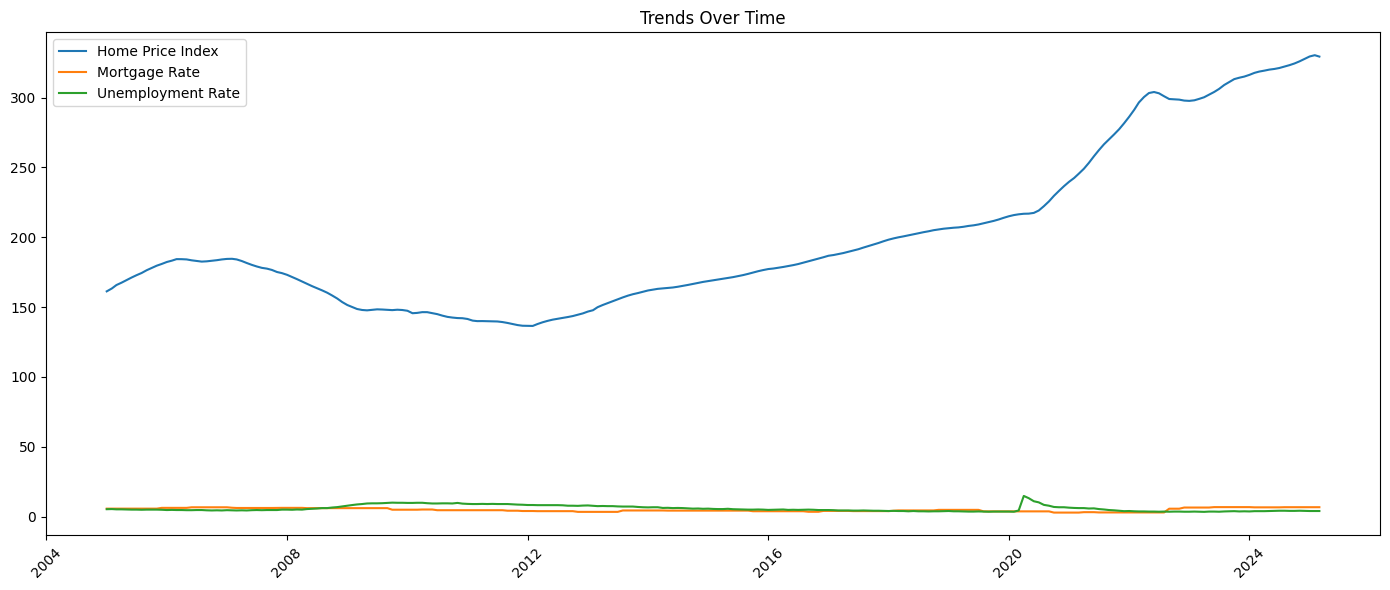

In [232]:
plt.figure(figsize=(14, 6))
plt.plot(master_df['Date'], master_df['Home_Price_Index'], label='Home Price Index')
plt.plot(master_df['Date'], master_df['Mortgage_Rate'], label='Mortgage Rate')
plt.plot(master_df['Date'], master_df['Unemployment_Rate'], label='Unemployment Rate')
plt.legend()
plt.title('Trends Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


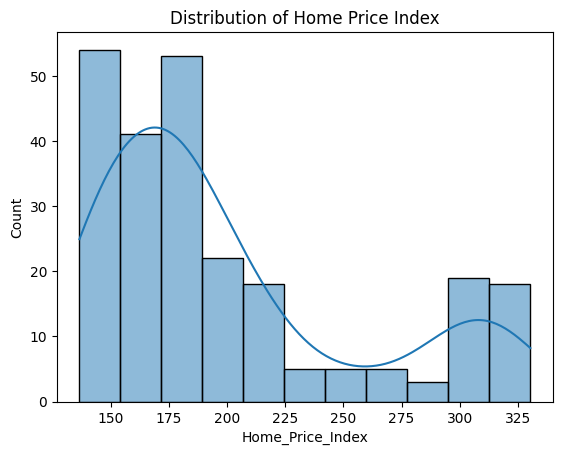

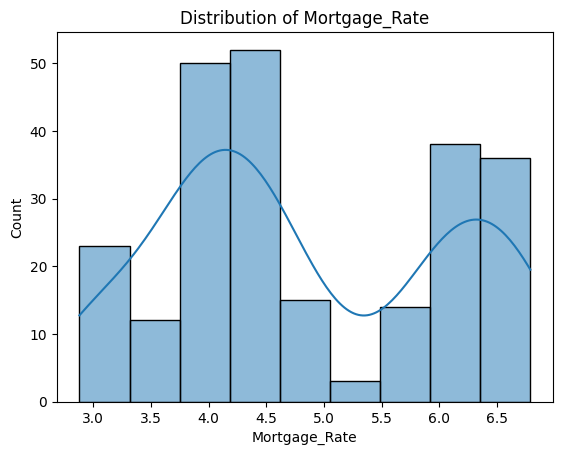

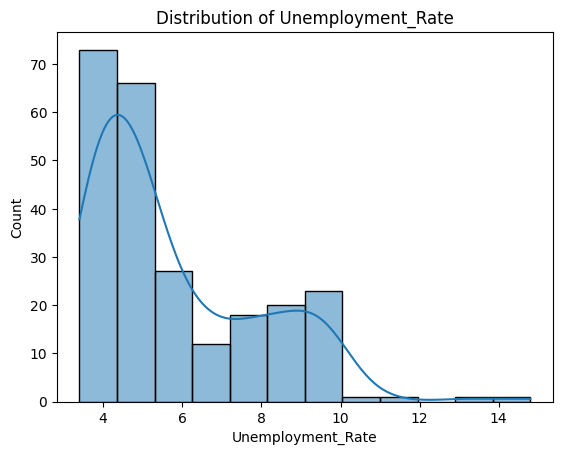

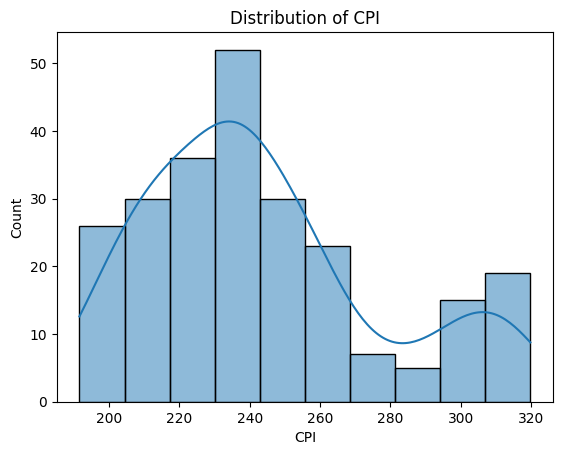

In [233]:
sns.histplot(master_df['Home_Price_Index'], kde=True)
plt.title('Distribution of Home Price Index')
plt.show()

sns.histplot(master_df['Mortgage_Rate'], kde=True)
plt.title('Distribution of Mortgage_Rate')
plt.show()

sns.histplot(master_df['Unemployment_Rate'], kde=True)
plt.title('Distribution of Unemployment_Rate')
plt.show()

sns.histplot(master_df['CPI'], kde=True)
plt.title('Distribution of CPI')
plt.show()

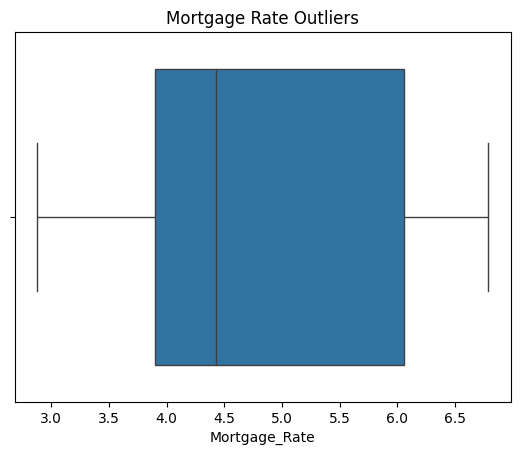

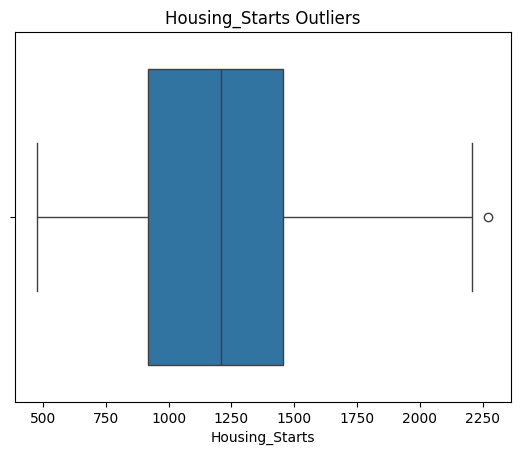

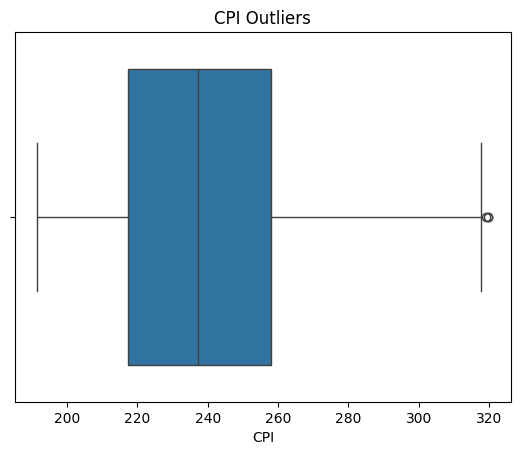

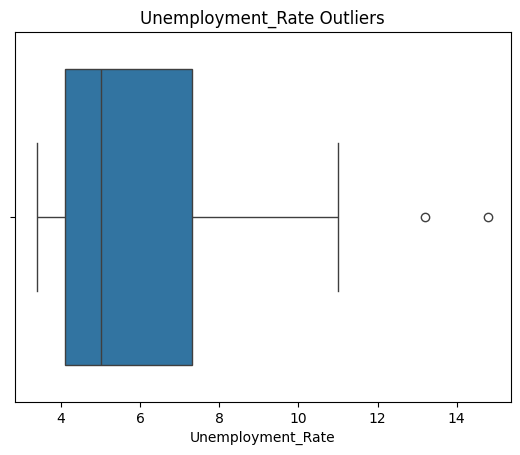

In [234]:
sns.boxplot(x=master_df['Mortgage_Rate'])
plt.title('Mortgage Rate Outliers')
plt.show()

sns.boxplot(x=master_df['Housing_Starts'])
plt.title('Housing_Starts Outliers')
plt.show()

sns.boxplot(x=master_df['CPI'])
plt.title('CPI Outliers')
plt.show()

sns.boxplot(x=master_df['Unemployment_Rate'])
plt.title('Unemployment_Rate Outliers')
plt.show()

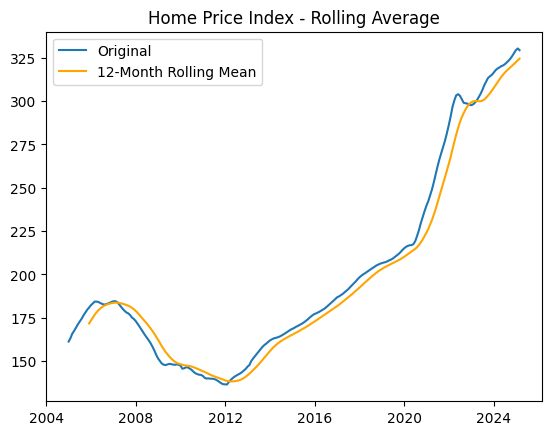

In [235]:
master_df['HPI_rolling'] = master_df['Home_Price_Index'].rolling(window=12).mean()

plt.plot(master_df['Date'], master_df['Home_Price_Index'], label='Original')
plt.plot(master_df['Date'], master_df['HPI_rolling'], label='12-Month Rolling Mean', color='orange')
plt.legend()
plt.title('Home Price Index - Rolling Average')
plt.show()


# **Feature Engineering**

In [236]:
import numpy as np
master_df['Year'] = master_df['Date'].dt.year
master_df['Month'] = master_df['Date'].dt.month

master_df['Post_COVID'] = master_df['Date'].apply(lambda x: 1 if x >= pd.to_datetime('2020-03-01') else 0)

master_df['Log_HPI'] = np.log(master_df['Home_Price_Index'])
master_df['Log_Unemployment'] = np.log1p(master_df['Unemployment_Rate'])

master_df['CPI_Growth'] = master_df['CPI'].pct_change().fillna(0)


In [237]:
master_df.columns

Index(['Date', 'Home_Price_Index', 'Mortgage_Rate', 'Unemployment_Rate',
       'Housing_Starts', 'CPI', 'Population_Monthly', 'HPI_rolling', 'Year',
       'Month', 'Post_COVID', 'Log_HPI', 'Log_Unemployment', 'CPI_Growth'],
      dtype='object')

In [238]:
master_df['Mortgage_Rate_Level'] = pd.cut(
    master_df['Mortgage_Rate'],
    bins=[0, 3.5, 5, 7],
    labels=['Low', 'Medium', 'High']
)


In [239]:
features = [
    'Mortgage_Rate',
    'Log_Unemployment',
    'Housing_Starts',
    'CPI',
    'CPI_Growth',
    'Population_Monthly',
    'Post_COVID',
    'Year',
    'Month'
]

target = 'Log_HPI'


In [240]:
master_df[features + [target]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mortgage_Rate       243 non-null    float64
 1   Log_Unemployment    243 non-null    float64
 2   Housing_Starts      243 non-null    int64  
 3   CPI                 243 non-null    float64
 4   CPI_Growth          243 non-null    float64
 5   Population_Monthly  243 non-null    float64
 6   Post_COVID          243 non-null    int64  
 7   Year                243 non-null    int32  
 8   Month               243 non-null    int32  
 9   Log_HPI             243 non-null    float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 17.2 KB


# **MODELING PHASE**

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X = master_df[[
    'Mortgage_Rate',
    'Log_Unemployment',
    'Housing_Starts',
    'CPI',
    'CPI_Growth',
    'Population_Monthly',
    'Post_COVID',
    'Year',
    'Month'
]]
y = master_df['Log_HPI']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.4f}")
print(f"Linear Regression R²: {r2:.4f}")


Linear Regression RMSE: 0.0287
Linear Regression R²: 0.9869


In [244]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")


Random Forest RMSE: 0.0083
Random Forest R²: 0.9989


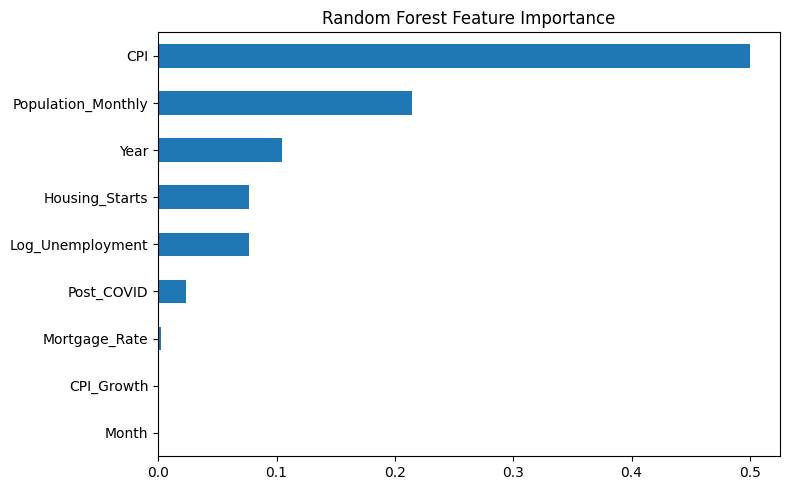

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(8,5))
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


# **Train-Test Split**

In [246]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = master_df.drop(columns=['Log_HPI'])   # Drop the target column
y = master_df['Log_HPI']                  # Use log-transformed HPI as the target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [259]:
print("Missing values in X_train:")
print(X_train.isnull().sum())


Missing values in X_train:
Home_Price_Index       0
Mortgage_Rate          0
Unemployment_Rate      0
Housing_Starts         0
CPI                    0
Population_Monthly     0
HPI_rolling            0
Year                   0
Month                  0
Post_COVID             0
Log_Unemployment       0
CPI_Growth             0
Mortgage_Rate_Level    0
dtype: int64


In [260]:
X_train = X_train.fillna(X_train.median(numeric_only=True))


In [261]:
if 'Date' in X_train.columns:
    X_train = X_train.drop(columns='Date')


In [262]:
print(X_train.dtypes)


Home_Price_Index       float64
Mortgage_Rate          float64
Unemployment_Rate      float64
Housing_Starts           int64
CPI                    float64
Population_Monthly     float64
HPI_rolling            float64
Year                     int32
Month                    int32
Post_COVID               int64
Log_Unemployment       float64
CPI_Growth             float64
Mortgage_Rate_Level    float64
dtype: object


In [266]:
# Reset column to original form
def label_mortgage_level(rate):
    if rate < 4:
        return 'Low'
    elif rate < 6:
        return 'Medium'
    else:
        return 'High'

X_train['Mortgage_Rate_Level'] = X_train['Mortgage_Rate'].apply(label_mortgage_level)
X_test['Mortgage_Rate_Level'] = X_test['Mortgage_Rate'].apply(label_mortgage_level)


In [267]:
from sklearn.preprocessing import OrdinalEncoder

# Convert to string just to be safe
X_train['Mortgage_Rate_Level'] = X_train['Mortgage_Rate_Level'].astype(str)
X_test['Mortgage_Rate_Level'] = X_test['Mortgage_Rate_Level'].astype(str)

# Encode the column
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
X_train['Mortgage_Rate_Level'] = encoder.fit_transform(X_train[['Mortgage_Rate_Level']])
X_test['Mortgage_Rate_Level'] = encoder.transform(X_test[['Mortgage_Rate_Level']])


In [268]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [270]:
# Drop 'Date' if present
X_test = X_test.drop(columns=['Date'], errors='ignore')

# Then predict
y_pred_rf = rf.predict(X_test)

# Now compute R²
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² Score: {r2:.4f}")


Random Forest R² Score: 0.9998


In [271]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse:.2f}")


Random Forest RMSE: 0.00


In [272]:
# Linear Regression predictions
y_pred_lr = lr.predict(X_test)

# Metrics
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression R² Score: {r2_lr:.4f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")


Linear Regression R² Score: 0.9992
Linear Regression RMSE: 0.01


# **Residual Analysis for Both Models**

In [273]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [274]:
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf


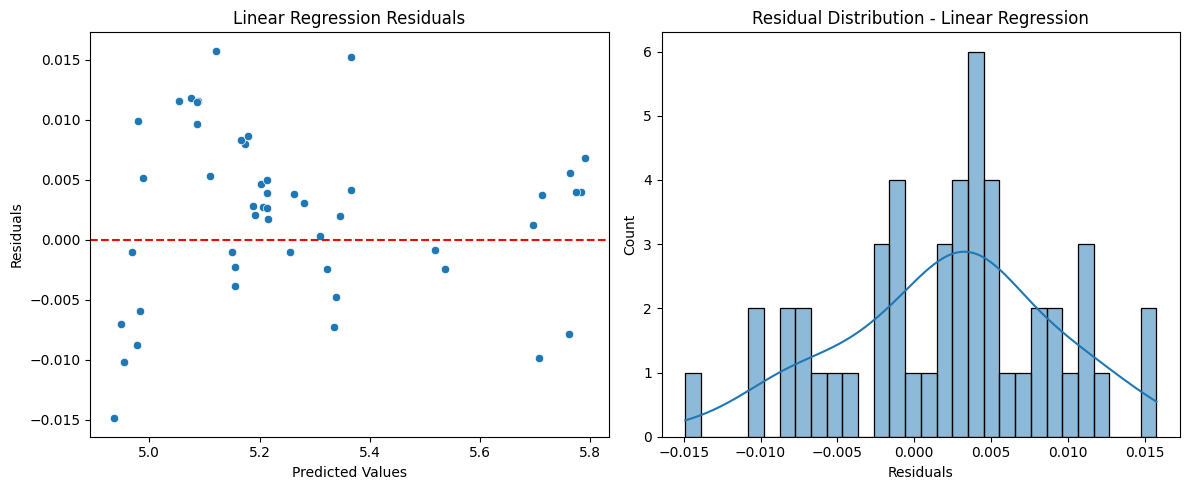

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression Residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(0, color='red', linestyle='--')
plt.title("Linear Regression Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
sns.histplot(residuals_lr, kde=True, bins=30)
plt.title("Residual Distribution - Linear Regression")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()


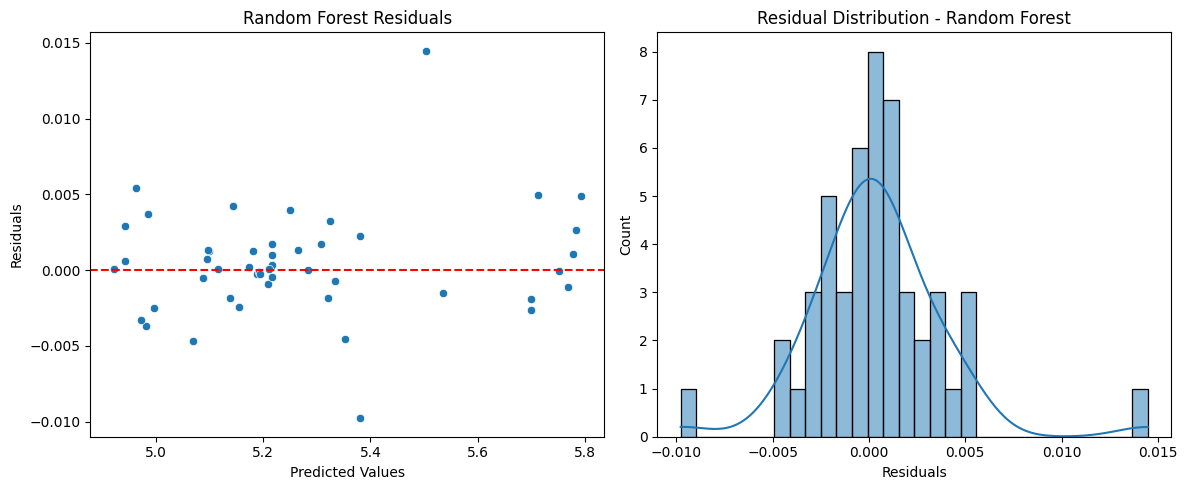

In [276]:
# Random Forest Residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, kde=True, bins=30)
plt.title("Residual Distribution - Random Forest")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()


# **Feature Importance (Random Forest)-Understanding which variables mattered most.**

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the table
print(feature_importance_df)


                Feature  Importance
0      Home_Price_Index    0.347115
6           HPI_rolling    0.269926
4                   CPI    0.206126
5    Population_Monthly    0.120080
7                  Year    0.031866
2     Unemployment_Rate    0.008887
9            Post_COVID    0.007649
10     Log_Unemployment    0.007088
1         Mortgage_Rate    0.000519
3        Housing_Starts    0.000282
11           CPI_Growth    0.000267
8                 Month    0.000133
12  Mortgage_Rate_Level    0.000062


<ipython-input-278-3220726619>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


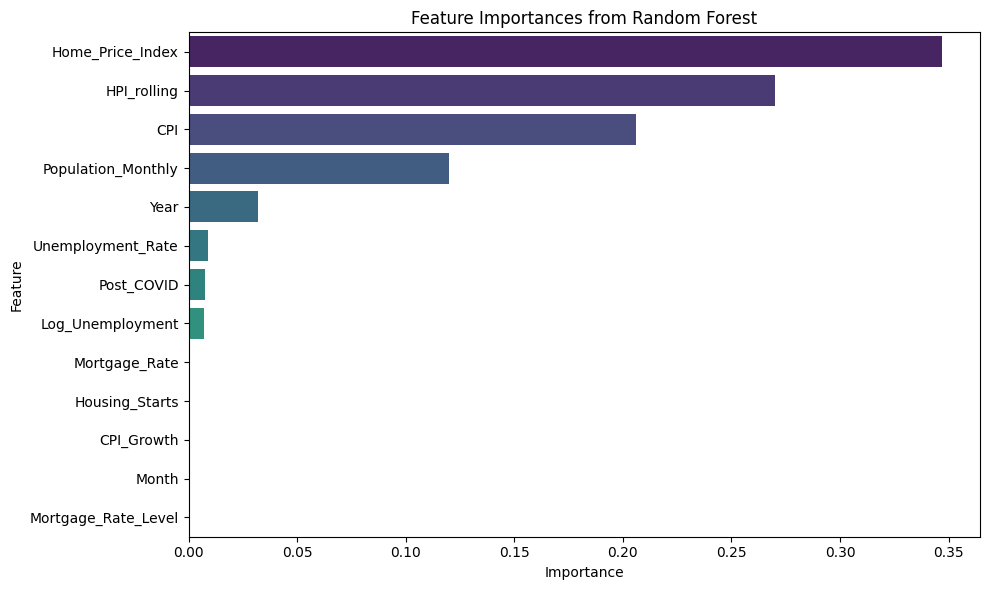

In [278]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# **Train Model with Top Features Only**

In [285]:
top_features = ['Home_Price_Index', 'HPI_rolling', 'CPI', 'Population_Monthly']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain model on top features
rf_top = RandomForestRegressor(random_state=42)
rf_top.fit(X_train_top, y_train)

# Evaluate
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred_top)
rmse = np.sqrt(mse)

print(f"R² Score (Top Features): {r2_score(y_test, y_pred_top):.4f}")
print(f"RMSE (Top Features): {rmse:.4f}")


R² Score (Top Features): 0.9997
RMSE (Top Features): 0.0042


In [286]:
# Save Final Model
import joblib
joblib.dump(rf, "final_random_forest_model.pkl")

['final_random_forest_model.pkl']

In [287]:
from google.colab import files
files.download('final_random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>